In [1]:
%matplotlib inline
import numpy as np
import math, random
import matplotlib.pyplot as plt

In [2]:
class Particle:
    def __init__(self,x,y,t,w):
        self.pos = np.array([x,y,t])
        self.w = w

class ParticleFilter:
    def __init__(self,num):
        self.particles = []
        for i in range(num):
            self.particles.append(Particle(0.0,0.0,0.0,1.0/num))
            
    def moveParticles(self,fw,rot,motion):
        for p in self.particles:
            after = motion(p.pos,fw,rot) 
            p.pos = after
            
    def draw(self):
        xs = [p.pos[0] for p in self.particles]
        ys = [p.pos[1] for p in self.particles]
        vxs = [math.cos(p.pos[2]) for p in self.particles]
        vys = [math.sin(p.pos[2]) for p in self.particles]
        plt.quiver(xs,ys,vxs,vys,color="blue",label="particles")

In [3]:
class Robot:
    def __init__(self,x,y,rad):
        self.actual_poses = [np.array([x,y,rad])]
        self.guess_poses = [np.array([x,y,rad])]
        random.seed()
        
        self.pf = ParticleFilter(50)
    
    def motion(self, pos, fw, rot):
        # go straight with fw and rotate with rot after that
        actual_fw = random.gauss(fw,fw/10)    #10% noise
        dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0) # 3[deg] direction noise before motion
        
        px, py, pt = pos[0],pos[1],pos[2]
        x = px + actual_fw * math.cos(pt + dir_error)
        y = py + actual_fw * math.sin(pt + dir_error)
        
        actual_rot = random.gauss(rot,rot/10) #10% noise
        t = pt + dir_error + actual_rot
        
        return np.array([x,y,t])
    
    def move(self,fw,rot):
        self.actual_poses.append(self.motion(self.actual_poses[-1],fw,rot))
        self.pf.moveParticles(fw,rot,self.motion)
        
    def draw(self):
        self.pf.draw()
        xs = [e[0] for e in self.actual_poses]
        ys = [e[1] for e in self.actual_poses]
        vxs = [math.cos(e[2]) for e in self.actual_poses]
        vys = [math.sin(e[2]) for e in self.actual_poses]
        plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion")

In [4]:
def draw(i=0):
    fig = plt.figure(i,figsize=(8, 8))
    sp = fig.add_subplot(111, aspect='equal')
    sp.set_xlim(-0.1,2.0)
    sp.set_ylim(-0.5,1.5)

    robot.draw()

    plt.legend()

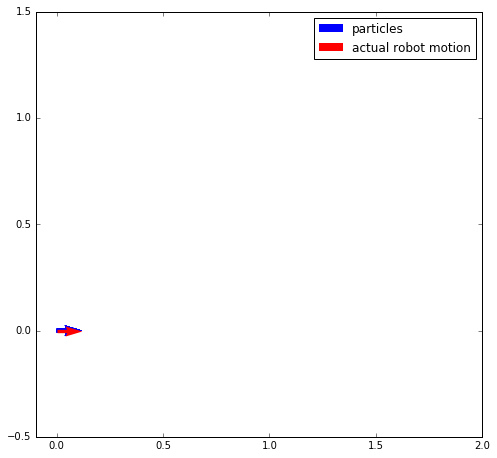

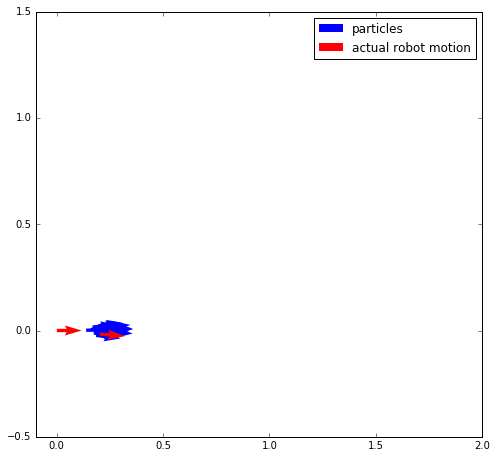

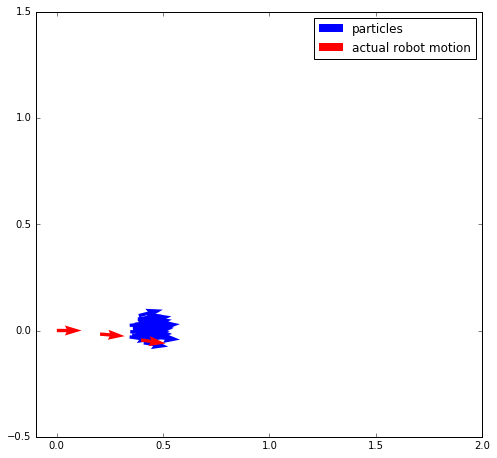

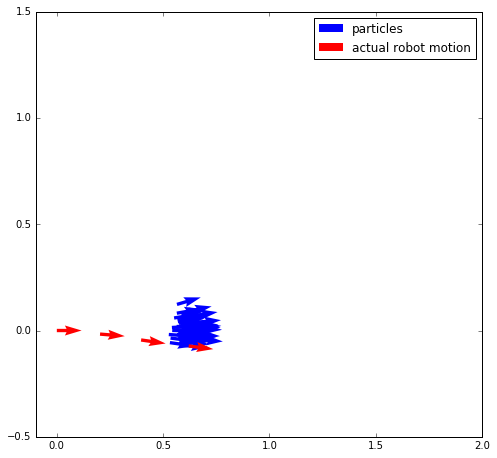

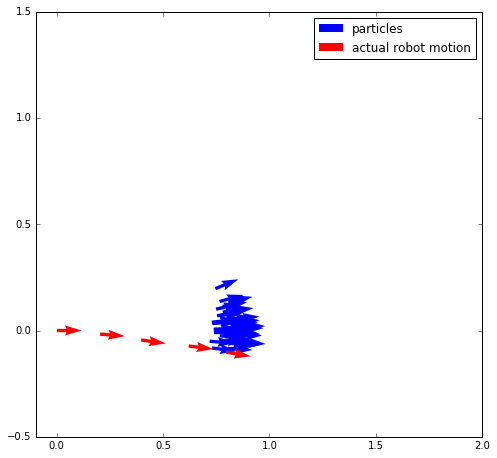

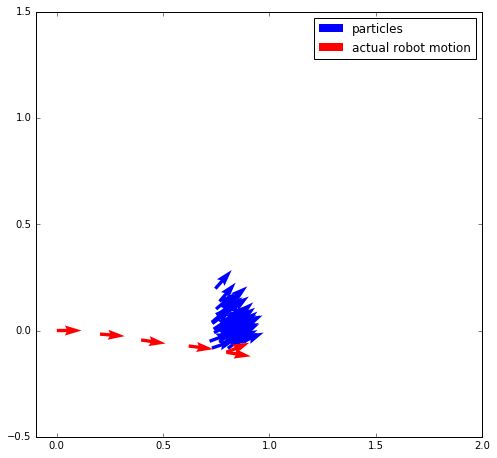

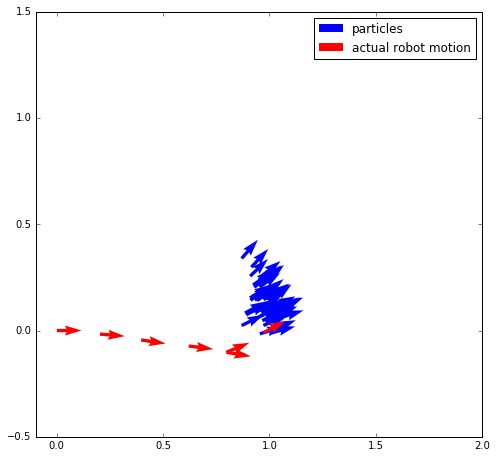

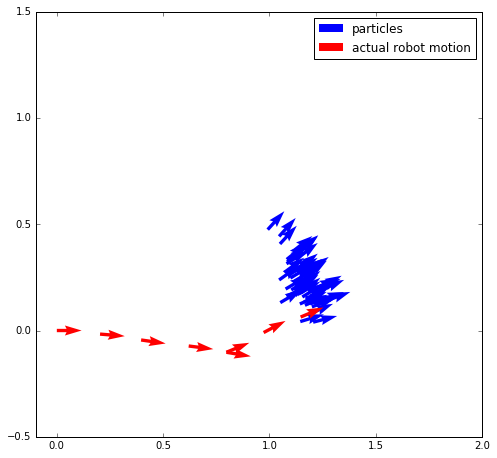

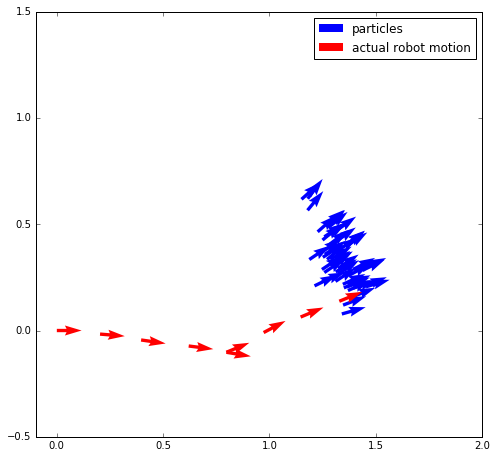

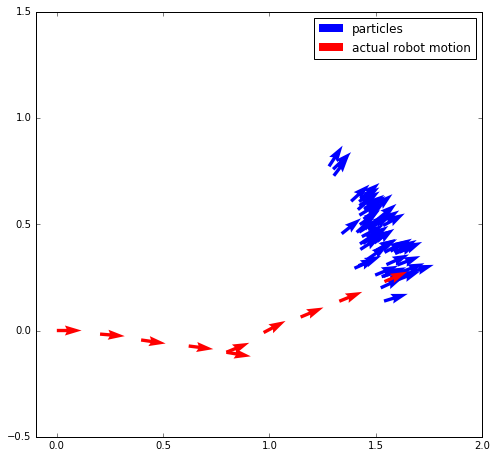

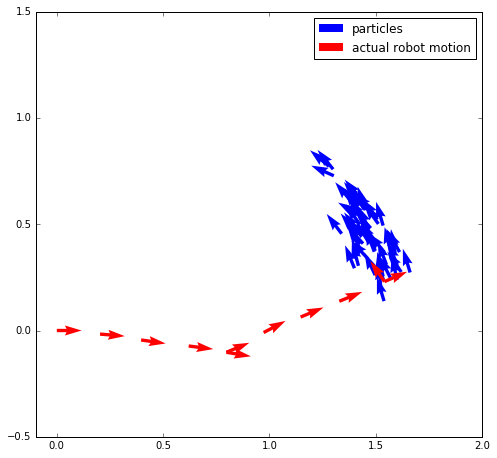

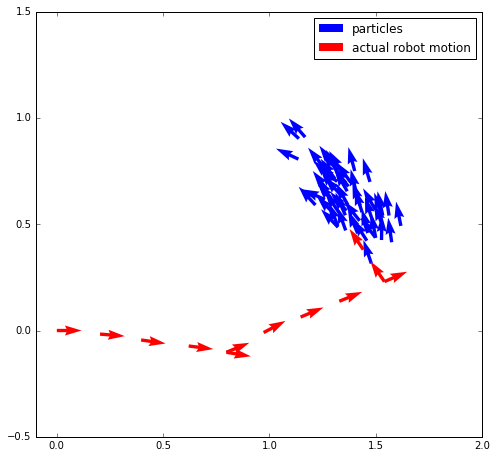

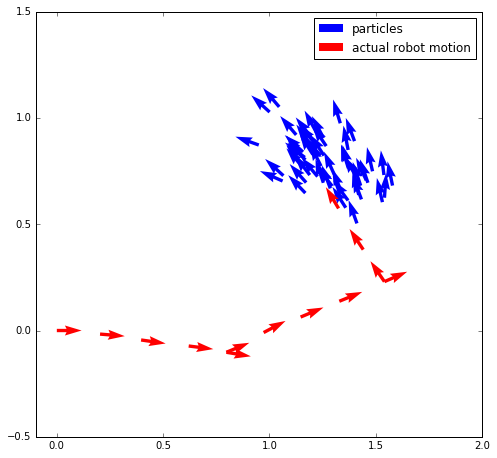

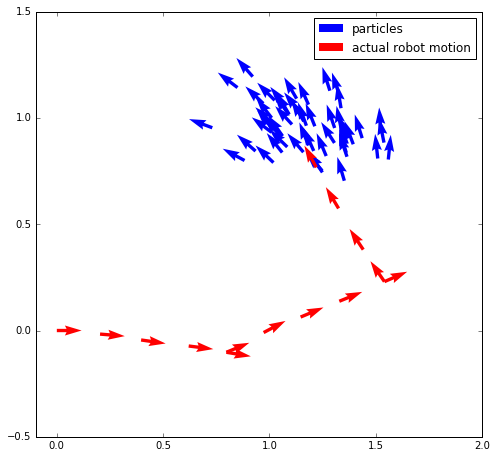

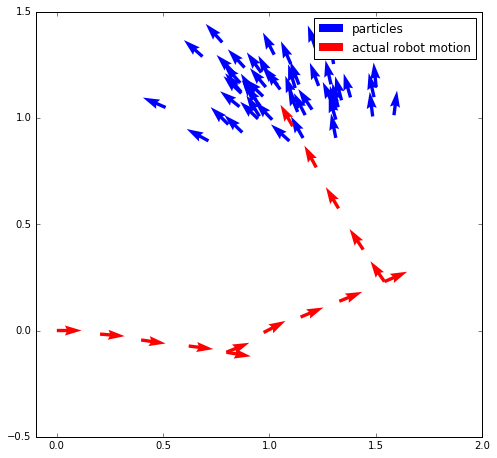

In [5]:
robot = Robot(0,0,0)
draw(0)

for i in range(1,5):
    robot.move(0.2,0.0)
    draw(i)

robot.move(0.0,math.pi / 180 * 30)
draw(5)    

for i in range(6,10):
    robot.move(0.2,0.0)
    draw(i)
    
robot.move(0.0,math.pi / 180 * 90)
draw(10)   

for i in range(11,15):
    robot.move(0.2,0.0)
    draw(i)